In [2]:
from rich import print

# 2023-02-14 底层塔计算 - 门洞钢筋的补全📢
2023-02-13，zeyu，wangdan  
2023-02-14，zeyu 分析

- **Firsrt_Tower_lxq_2.cae**
  - **模型描述**：
    - 底层塔门洞部分加入了斜向的钢筋和圈筋（？是这么叫嘛哈哈哈） 
  - **结果分析**：
    - **Firsrt_Tower_zy_9.inp:** 其它荷载，本构都和Firsrt_Tower_zy_8.inp一致，只是多加了几根钢筋。
                             结果：还是会破坏
    - **Firsrt_Tower_zy_10.inp:** 其它荷载，本构都和Firsrt_Tower_zy_7.inp一致，只是多加了几根钢筋。
                             结果：损伤比较严重。拉和压都比较严重？幅值和没加门筋的时候差不多。
                                   所以说门筋对混凝土破坏起作用不大？还是说钢筋的弹性模量弄错了？
<br/>

## 应力应变分布在有无加强筋下的对比分析

### 考虑了混凝土的损伤因子:  
有无加强筋对受拉应力的影响较大，而对于其它的影响十分小。可以认为没太大的影响？

---
**混凝土应力应变云图：**
||受拉应力云图|受拉应变云图|受压应力云图|受压应变云图|
|:---|:---:|:---:|:---:|:---:|
|**无加强筋**|![Zy_7_S_Max_Principal.png](./Picture/First_Tower_analysis/Zy_7_S_Max_Principal.png)|![Zy_7_PE_Max_Principal.png](./Picture/First_Tower_analysis/Zy_7_PE_Max_Principal.png)|![Zy_7_S_Min_Principal.png](./Picture/First_Tower_analysis/Zy_7_S_Min_Principal.png)|![Zy_7_PE_Min_Principal.png](./Picture/First_Tower_analysis/Zy_7_PE_Min_Principal.png)|
||max: 2.844Mpa|max: 3.076e-2|max: 43.35Mpa|max: 9.67e-3|
|**有加强筋**|![Zy_10_S_Max_Principal.png](./Picture/First_Tower_analysis/Zy_10_S_Max_Principal.png)|![Zy_10_PE_Max_Principal.png](./Picture/First_Tower_analysis/Zy_10_PE_Max_Principal.png)|![Zy_10_S_Min_Principal.png](./Picture/First_Tower_analysis/Zy_10_S_Min_Principal.png)|![Zy_10_PE_Min_Principal.png](./Picture/First_Tower_analysis/Zy_10_PE_Min_Principal.png)|
||max: 2.33Mpa|max: 3.006e-2|max: 44.96Mpa|max: 9.141e-3|
  
---
<br/>

**门筋（加强筋？）应力应变云图**
|Mises应力云图|最大标准应变云图|
|:---:|:---:|
|![Zy_7_S_Max_Principal.png](./Picture/First_Tower_analysis/Zy_10_S_Mises_menjin.png)|![Zy_7_PE_Max_Principal.png](./Picture/First_Tower_analysis/Zy_10_E_Max_Principal_menjin.png)|
|max: 349.8Mpa|max: 1.734e-3|

# 2023-02-12 底层钢塔计算 - 尝试修改荷载📢
2023-02-12，zeyu  
2023-02-13, zeyu 修改

- **Firsrt_Tower_lxq_1.cae**
  - **模型描述**：
    - None
  - **结果分析**：
    - **Firsrt_Tower_zy_6.inp:** 顶部荷载改为了-1.01306E+08N，比之前的大了一个数量级。考虑了钢筋塑性和混凝土损伤因子。
    - **Firsrt_Tower_zy_7.inp:** 顶部荷载改为了(-9.6434e+07)N，比之前的大了一个数量级。考虑了钢筋塑性和混凝土损伤因子。顶部竖向荷载是预应力钢筋和4.04m处竖向荷载叠加得到，具体计算在jupyter中。  
                             结果：结果比较正常，认为这样的计算是正确的。门洞附近的混凝土拉伸破坏比较严重，可以认为是没有**加入门洞的加强筋造成**的。  
                                   但是事实上，混凝土拉碎是比较正常的现象，或许可以接受？
    - **Firsrt_Tower_zy_8.inp:** 其它和 Firsrt_Tower_zy_7 一致，但是不考虑混凝土的损伤因子。用于得到损伤因子对这次分析的影响。  
                             结果：有损伤因子的混凝土最大拉应力和最大压应力都比没有损伤因子的时候大。（拉：2.8，2.3；压：43，37）
                                   两者的应力分布是比较相似的。

## 计算最底层塔顶部荷载

> 第一层塔计算过程中采用的顶部荷载为（高度4.04m）：  
单位 $KN$ / $KN \cdot m$
  | Mx | My | Mxy | Mz | Fx | Fy | Fxy | Fz | Safety factor |
  |:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:------------:|
  | 175636 | -25792.8 | 177520 | 3896.42 | -224.892 | -1391.3 | 1409.35 | -21179.4 | 1.1 |

实际在abaqus中，有 $M_{xy} = (177520)KN \cdot m$，即$M_{x} = 175636KN; M_{y} = -25792.8KN$，$F_{z} = (-21179.4)KN$。  

> 预应力钢筋有：根据图纸中36 孔预应力索，每孔9 根15.2mm 钢绞线，张拉控制应力1280MPa，考虑约138MPa 的预应力损失，通过降温法施加预应力。  
即预应力钢筋截面积为：$9 \times \frac{1}{4} (0.0152m)^{2} \times \pi = 0.0016m^{2}$  

预应力造成的荷载为：$(1.28E+09)Pa \times (0.0016)m^{2} \times 36 = (7.5254e+07) N$

即第一层塔顶的总荷载：$7.5254e7 + 21179.4e3 = 9.6434e7 N$

In [3]:
import numpy as np

# unit: N, m
area_per_prestress = 9 * 1 / 4 * (0.0152)**2 * np.pi
Load_per_prestress_bar = 1.28e9 * area_per_prestress
Load_prestress_bar = 36 * Load_per_prestress_bar

msg = 'Area_per_prestress : {:.4e} m2\n'.format(area_per_prestress)
msg += 'Load per prestress bar : {:.4e} N\n'.format(Load_per_prestress_bar)
msg += 'Load prestress bar : {:.4e} N\n'.format(Load_prestress_bar)

Fz = 21179.4e3
Fz_on_First_Tower = Fz + Load_prestress_bar

msg += '\nFz on first tower top without prestress: {:.4e}\n'.format(Fz)
msg += 'Fz on first tower top : {:.4e} N\n'.format(Fz_on_First_Tower)

print(msg)

area_per_prestress : 1.6331e-03 m2
Load per prestress bar : 2.0904e+06 N
Load prestress bar : 7.5254e+07 N

Fz on first tower top without prestress: 2.1179e+07
Fz on first tower top : 9.6434e+07 N

## 应力应变分布在有无损伤因子的条件下的对比

对于应力：  
有损伤因子的混凝土最大拉应力和最大压应力都比没有损伤因子的时候大。（拉：2.8，2.3；压：43，37） 两者的应力分布是比较相似的。  
对于应变：  
有损伤因子的混凝土相对于无损伤因子会偏大。且有无损伤因子对于应变的分布影响比较大。

<!--|考虑**混凝土损伤因子**受拉应变云图|未考虑混凝土损伤因子受拉应变云图|
|:----:|:----:|
| ![Zy_7_S_Max_Principal.png](./Picture/First_Tower_analysis/Zy_7_S_Max_Principal.png) |![Zy_8_S_Max_Principal.png](./Picture/First_Tower_analysis/Zy_8_S_Max_Principal.png)|

|考虑**混凝土损伤因子**受拉应变云图|未考虑混凝土损伤因子受拉应变云图|
|:----:|:----:|
| ![Zy_7_S_Min_Principal.png](./Picture/First_Tower_analysis/Zy_7_S_Min_Principal.png) |![Zy_8_S_Min_Principal.png](./Picture/First_Tower_analysis/Zy_8_S_Min_Principal.png)|

|考虑**混凝土损伤因子**受拉应变云图|未考虑混凝土损伤因子受拉应变云图|
|:----:|:----:|
| ![Zy_7_PE_Max_Principal.png](./Picture/First_Tower_analysis/Zy_7_PE_Max_Principal.png) |![Zy_8_PE_Max_Principal.png](./Picture/First_Tower_analysis/Zy_8_PE_Max_Principal.png)|

|考虑**混凝土损伤因子**受压应变云图|未考虑混凝土损伤因子受压应变云图|
|:----:|:----:|
| ![Zy_7_PE_Min_Principal.png](./Picture/First_Tower_analysis/Zy_7_PE_Min_Principal.png) |![Zy_8_PE_Min_Principal.png](./Picture/First_Tower_analysis/Zy_8_PE_Min_Principal.png)|-->


||受拉应力云图|受拉应变云图|受压应力云图|受压应变云图|
|:---|:---:|:---:|:---:|:---:|
|**考虑损伤因子**|![Zy_7_S_Max_Principal.png](./Picture/First_Tower_analysis/Zy_7_S_Max_Principal.png)|![Zy_7_PE_Max_Principal.png](./Picture/First_Tower_analysis/Zy_7_PE_Max_Principal.png)|![Zy_7_S_Min_Principal.png](./Picture/First_Tower_analysis/Zy_7_S_Min_Principal.png)|![Zy_7_PE_Min_Principal.png](./Picture/First_Tower_analysis/Zy_7_PE_Min_Principal.png)|
||max: 2.844Mpa|max: 3.076e-2|max: 43.35Mpa|max: 9.67e-3|
|**不考虑损伤因子**|![Zy_8_S_Max_Principal.png](./Picture/First_Tower_analysis/Zy_8_S_Max_Principal.png)|![Zy_8_PE_Max_Principal.png](./Picture/First_Tower_analysis/Zy_8_PE_Max_Principal.png)|![Zy_8_S_Min_Principal.png](./Picture/First_Tower_analysis/Zy_8_S_Min_Principal.png)|![Zy_8_PE_Min_Principal.png](./Picture/First_Tower_analysis/Zy_8_PE_Min_Principal.png)|
||max: 2.338Mpa|max: 3.875e-3|max: 37.1Mpa|max: 1.81e-3|

# 2023-02-11 底层钢塔计算 - 尝试修改荷载📢
2023-02-11，zeyu

- **Firsrt_Tower_lxq_1.cae**
  - **模型描述**：
    - None
  - **结果分析**：
    - **Firsrt_Tower_zy_1.inp:** 顶部荷载改为了-1.11794e8，比之前的大了一个数量级。错误：重力施加出错
    - **Firsrt_Tower_zy_2.inp:** 顶部荷载和上面一样，较大。同时钢筋的塑性段略去。错误：重力施加出错
    - **Firsrt_Tower_zy_3.inp:** 顶部荷载和上面一样，较大，钢筋没有塑性，混凝土没有损伤。错误：重力施加出错
    - **Firsrt_Tower_zy_4.inp:** 顶部荷载改为-21179.4kN，和Excel中一致。运行较为顺畅，但钢筋没有塑性以及混凝土没有损伤因子。
                            结果：整个过程中混凝土的最大拉应力为2.931Mpa，最大压应力为14.73Mpa. 此时对应的受拉塑性应变为3.321e-3，受压塑性应变为6.923e-4.
    - **Firsrt_Tower_zy_5.inp:** 顶部荷载改为-21179.4kN，和Excel中一致。把钢筋塑性和混凝土损伤因子加上了。结果还是破坏的地方很多。
                            结果：混凝土大范围出现拉伸破坏。

## 关于CDP模型的描述以及不考虑损伤因子时的应变分析

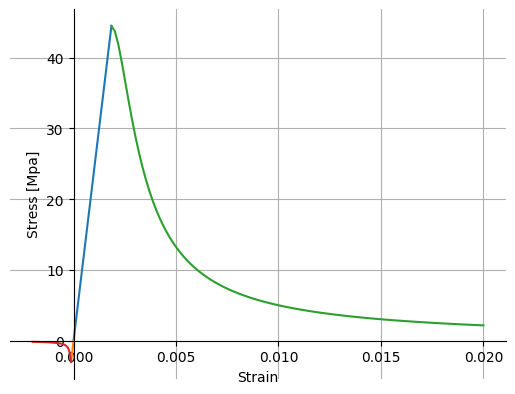

标准值
最大压应力为: 44.4994，对应的压应变为：1.8487e-03
最大拉应力为：2.9900，对应的拉应变：1.1765e-04

- **Firsrt_Tower_zy_4.inp:** 
顶部荷载改为-21179.4kN，和Excel中一致。运行较为顺畅，但钢筋没有塑性以及混凝土没有损伤因子。 
结果：整个过程中混凝土的最大拉应力为2.931Mpa，最大压应力为14.73Mpa. 
此时对应的受拉塑性应变为3.321e-3，受压塑性应变为6.923e-4.

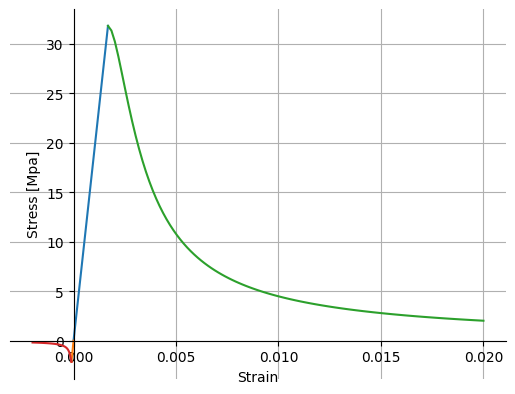

设计值
最大压应力为: 31.7977，对应的压应变为：1.6807e-03
最大拉应力为：2.1342，对应的拉应变：1.0084e-04

In [18]:
from code_concrete_latest import CDP_model

cc = CDP_model(this_model=None)
cc.SetValue(code='C70', strength_type='Standard')
cc.Plot()

msg = '标准值\n' 
msg += '最大压应力为: {:.4f}，对应的压应变为：{:.4e}\n'.format(
    cc.compression_yield_stress[cc.compression_inelastic_index], cc.compression_inelastic_strain[cc.compression_inelastic_index])
msg += '最大拉应力为：{:.4f}，对应的拉应变：{:.4e}\n'.format(
    cc.tensile_yield_stress[cc.tensile_inelastic_index], cc.tensile_inelastic_strain[cc.tensile_inelastic_index])

print(msg)

msg = '- **Firsrt_Tower_zy_4.inp:** 顶部荷载改为-21179.4kN，和Excel中一致。运行较为顺畅，但钢筋没有塑性以及混凝土没有损伤因子。 \n'
msg += '结果：整个过程中混凝土的最大拉应力为2.931Mpa，最大压应力为14.73Mpa. 此时对应的受拉塑性应变为3.321e-3，受压塑性应变为6.923e-4.\n\n'
print(msg)

cc.SetValue(code='C70', strength_type='Design')
cc.Plot()

msg = '设计值\n' 
msg += '最大压应力为: {:.4f}，对应的压应变为：{:.4e}\n'.format(
    cc.compression_yield_stress[cc.compression_inelastic_index], cc.compression_inelastic_strain[cc.compression_inelastic_index])
msg += '最大拉应力为：{:.4f}，对应的拉应变：{:.4e}\n'.format(
    cc.tensile_yield_stress[cc.tensile_inelastic_index], cc.tensile_inelastic_strain[cc.tensile_inelastic_index])

print(msg)

In [15]:
import numpy as np

# unit: N, m
dim = np.array([25e-3, 16e-3])
area = dim**2 * np.pi * (1 / 4)

line1 = 'diameter(m ) : '
line2 = 'area    (m2) : '
for i in range(dim.shape[0]):
    line1 += '{:8.4e}    '.format(dim[i])
    line2 += '{:8.4e}    '.format(area[i])

print(line1 + '\n' + line2)

diameter(m ) : 2.5000e-02    1.6000e-02    
area    (m2) : 4.9087e-04    2.0106e-04